In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\50_Startups.csv")
df = pd.DataFrame(data)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df1 = df.drop_duplicates()

In [8]:
df2 = pd.get_dummies(df1,columns=['State'])

In [9]:
df3 = df2.rename({'Marketing Spend': 'Marketing_Spend','R&D Spend':'R_D_Spend','State_New York': 'State_New_York'}, axis=1)
df3.head()

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


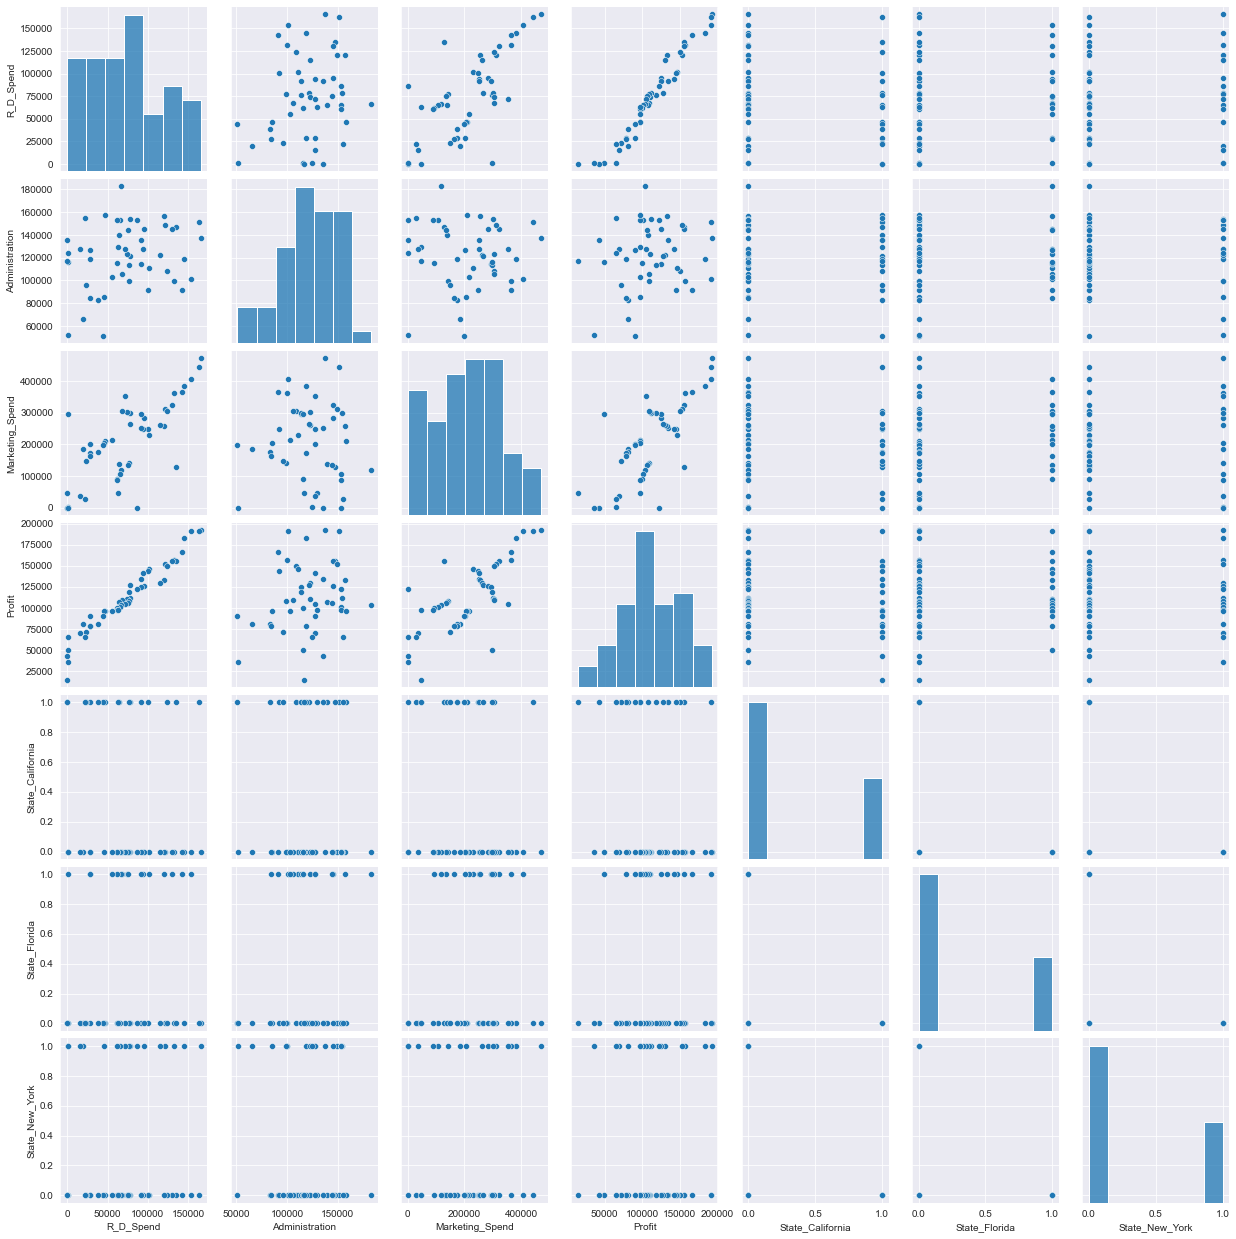

In [34]:
import seaborn as sns
# Create the default pairplot
sns.set_style(style='darkgrid')
sns.pairplot(df3)

In [10]:
df3.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
R_D_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New_York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=df3).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        18:30:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R_D_Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.47e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
import statsmodels.formula.api as smf 
model1 = smf.ols('Profit~Administration',data=df3).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.162
Time:                        18:30:46   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

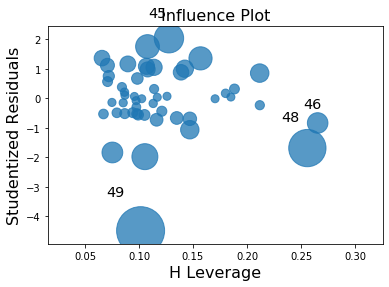

In [15]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

plt.show()

In [16]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


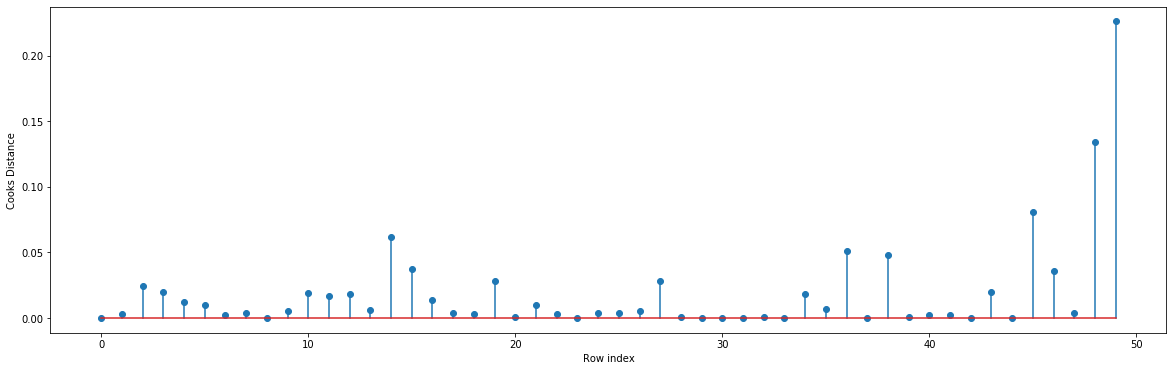

In [17]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(df3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [18]:
(np.argmax(c_V),np.max(c_V))

(49, 0.22625094501509274)

In [19]:
df3[df3.index.isin([49,48,45])]

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
45,1000.23,124153.04,1903.93,64926.08,0,0,1
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [20]:
df4 = df3.drop(df3.index[[49,48,45]],axis=0).reset_index()

In [21]:
df5 = df4.reset_index()
df5.tail()

,level_0,index,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
42,42,42,23640.93,96189.63,148001.11,71498.49,1,0,0
43,43,43,15505.73,127382.30,35534.17,69758.98,0,0,1
44,44,44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,45,46,1315.46,115816.21,297114.46,49490.75,0,1,0
46,46,47,0.00,135426.92,0.00,42559.73,1,0,0


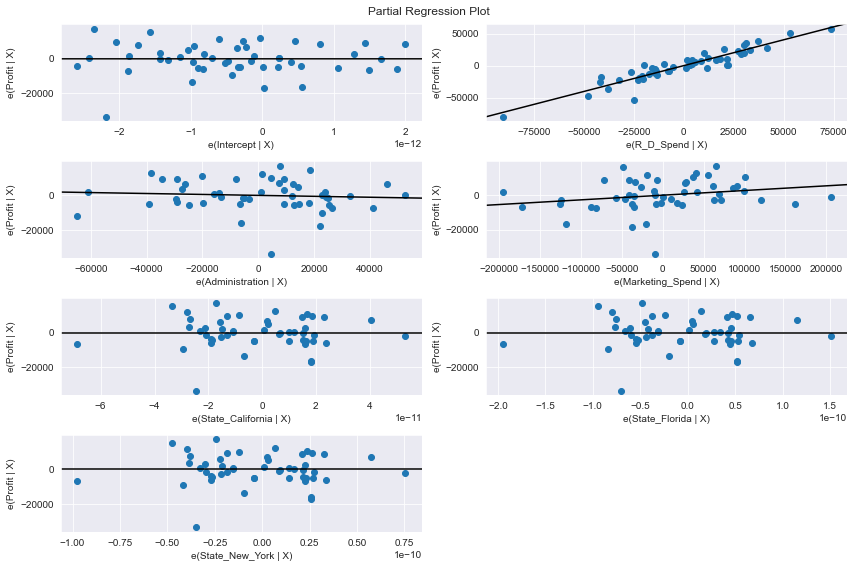

In [56]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)              
plt.show()

In [22]:
df6 = df1.rename({'Marketing Spend': 'Marketing_Spend','R&D Spend':'R_D_Spend'}, axis=1)
df6.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
model6 = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend+State',data=df6).fit()

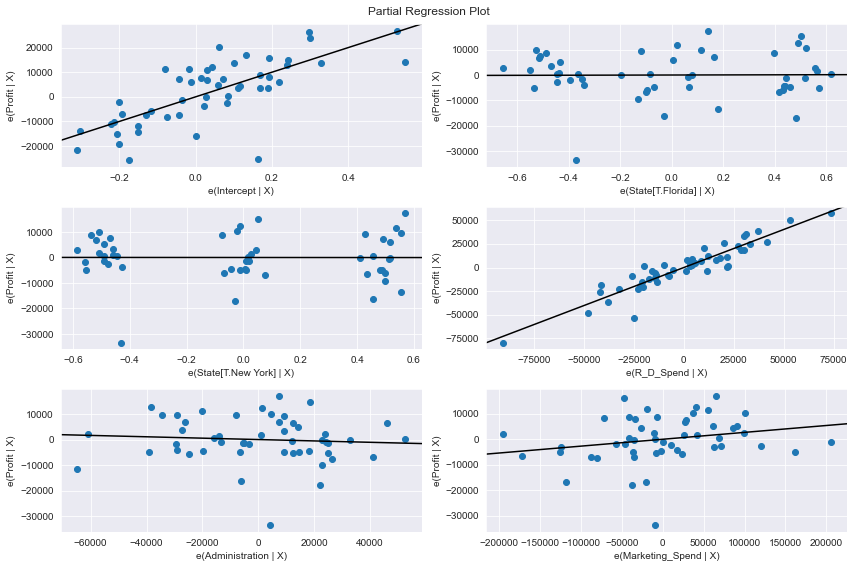

In [60]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model6,fig=fig)          # by this we can ignore state
plt.show()

In [24]:
f_model_1 = smf.ols('Profit~R_D_Spend+Marketing_Spend',data=df5).fit()

In [25]:
f_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     560.6
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.97e-32
Time:                        18:31:49   Log-Likelihood:                -482.84
No. Observations:                  47   AIC:                             971.7
Df Residuals:                      44   BIC:                             977.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.982e+04   2438.557     20.430      0.000    4.49e+04    5.47e+04
R_D_Spend           0.7753      0.033     23.330      0.000       0.708       0.842
Marketing_Spend     0.0273      0.012      2.189      0.034       0.002       0.053
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.125
Skew:                          -0.056   Prob(JB):                        0.939
Kurtosis:                       2.774   Cond. No.                     6.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

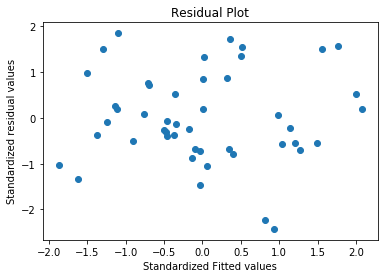

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(f_model_1.fittedvalues),
            get_standardized_values(f_model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# PREDICTIONS

In [27]:
pred_y = f_model_1.predict(df3)

In [28]:
pred_y

0     190914.074324
1     188018.360678
2     179936.254172
3     172228.714641
4     170006.926818
5     161984.932987
6     157678.337557
7     159694.932815
8     151796.169048
9     153779.724095
10    135098.364984
11    134698.972599
12    129423.224818
13    128049.636662
14    149824.892150
15    145767.022554
16    117531.037753
17    130933.448257
18    129016.470587
19    116820.329420
20    117105.507634
21    118790.561493
22    115481.173423
23    110510.855344
24    113395.311109
25    103726.326407
26    111887.166848
27    115381.723476
28    104259.703309
29    103612.840866
30    100375.567747
31     99630.637588
32    100240.389142
33     98712.839692
34     91577.673441
35     91113.838106
36     77542.279211
37     89374.517268
38     70569.623211
39     84499.158596
40     76837.812325
41     75942.331974
42     72195.459744
43     62813.026093
44     67788.912681
45     50647.462757
46     58964.073622
47     49819.932731
48     50240.179099
49     51055.141704


# CROSS VALIDATION

In [29]:
# rmse of the data
final_ml_V= smf.ols('Profit~R_D_Spend+Marketing_Spend',data = df3).fit()

pred=final_ml_V.predict(df3)
actual=df.Profit
errors=actual-pred
errors.mean()
rmse=np.sqrt(np.mean(errors**2))
rmse

8881.88589244917

In [30]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(df3,test_size=0.3)

In [31]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [32]:
#rmse of the train data
train_model=smf.ols("Profit~R_D_Spend+Marketing_Spend",data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Profit
errors_train=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

9682.594535045528

In [33]:

predtest=train_model.predict(test_data)
actualtest=test_data.Profit
errors_test=predtest-actualtest                                   
rmse_test=RMSE(predtest,actualtest)
rmse_test

6666.733093224973

In [37]:
data_pd = np.asarray(data) 
data_pd

array([[165349.2, 136897.8, 471784.1, 'New York', 192261.83],
       [162597.7, 151377.59, 443898.53, 'California', 191792.06],
       [153441.51, 101145.55, 407934.54, 'Florida', 191050.39],
       [144372.41, 118671.85, 383199.62, 'New York', 182901.99],
       [142107.34, 91391.77, 366168.42, 'Florida', 166187.94],
       [131876.9, 99814.71, 362861.36, 'New York', 156991.12],
       [134615.46, 147198.87, 127716.82, 'California', 156122.51],
       [130298.13, 145530.06, 323876.68, 'Florida', 155752.6],
       [120542.52, 148718.95, 311613.29, 'New York', 152211.77],
       [123334.88, 108679.17, 304981.62, 'California', 149759.96],
       [101913.08, 110594.11, 229160.95, 'Florida', 146121.95],
       [100671.96, 91790.61, 249744.55, 'California', 144259.4],
       [93863.75, 127320.38, 249839.44, 'Florida', 141585.52],
       [91992.39, 135495.07, 252664.93, 'California', 134307.35],
       [119943.24, 156547.42, 256512.92, 'Florida', 132602.65],
       [114523.61, 122616.84, 261

In [40]:
# input 
X = data_pd[:, :-1] 

#output 
Y = data_pd[:, -1] 

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6, 152211.77, 149759.96, 146121.95, 144259.4,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9, 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
       99937.59, 97483.56, 97427.84, 96778.92, 96712.8, 96479.51,
       90708.19, 89949.14, 81229.06, 81005.76, 78239.91, 77798.83,
       71498.49, 69758.98, 65200.33, 64926.08, 49490.75, 42559.73,
       35673.41, 14681.4], dtype=object)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(data_pd[:, :-1],
                                                    data_pd[:, -1],
                                                    test_size=0.25)

(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

((37, 4), (37,), (13, 4), (13,))

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression




# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(X_train, Y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(X_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_Y_pred - Y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


ValueError: could not convert string to float: 'New York'